In [2]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("D:\INTELLIPAAT\PYTHON\Materials\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#outliers

col= df.columns

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

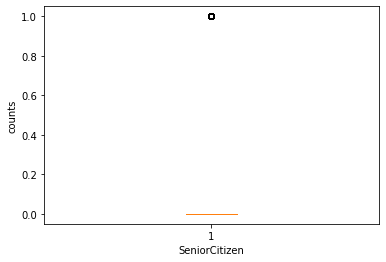

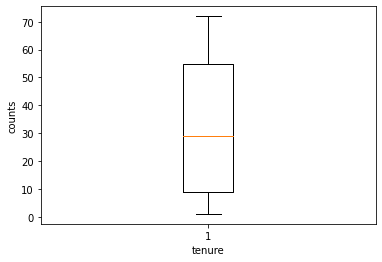

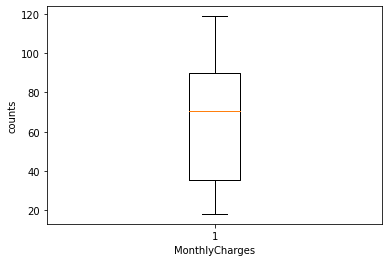

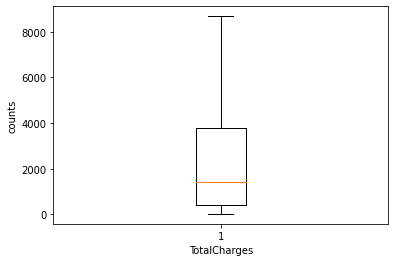

In [16]:
for i in col:
    if df[i].dtype!="object":
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("counts")
        plt.show()

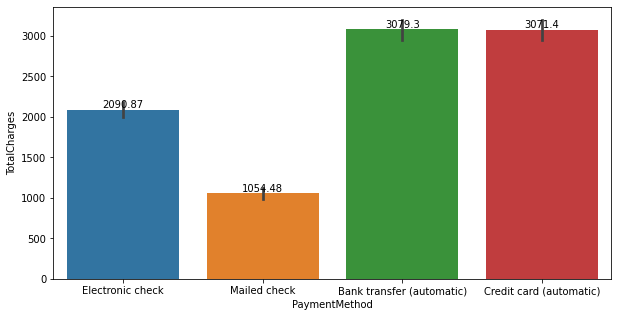

In [17]:
plt.figure(figsize = (10,5))
ax = sns.barplot(y='TotalCharges',x='PaymentMethod',data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [18]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
#object = class()
le = LabelEncoder()

In [19]:
for i in col:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])

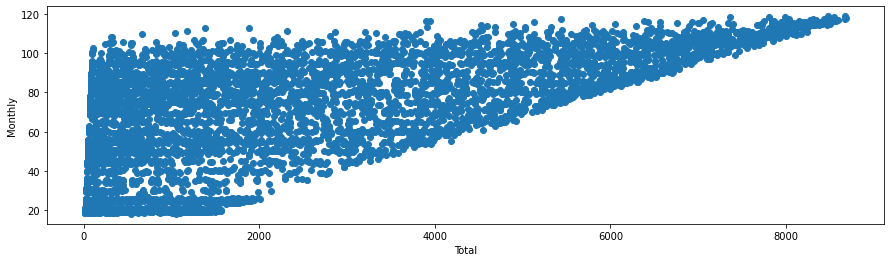

In [21]:
plt.figure(figsize=(15,4))
plt.scatter(df['TotalCharges'],df['MonthlyCharges'])
plt.xlabel("Total")
plt.ylabel("Monthly")
plt.show()

In [22]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,0.007209,-0.006987,0.004497,-0.012335,0.013740,-0.002960,-0.006726,0.001763,-0.007650,-0.017207,0.015949,-0.002225,0.011754,-0.004445,-0.000263,-0.017858
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.007209,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,0.004497,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.012335,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,0.013740,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050


<Axes: >

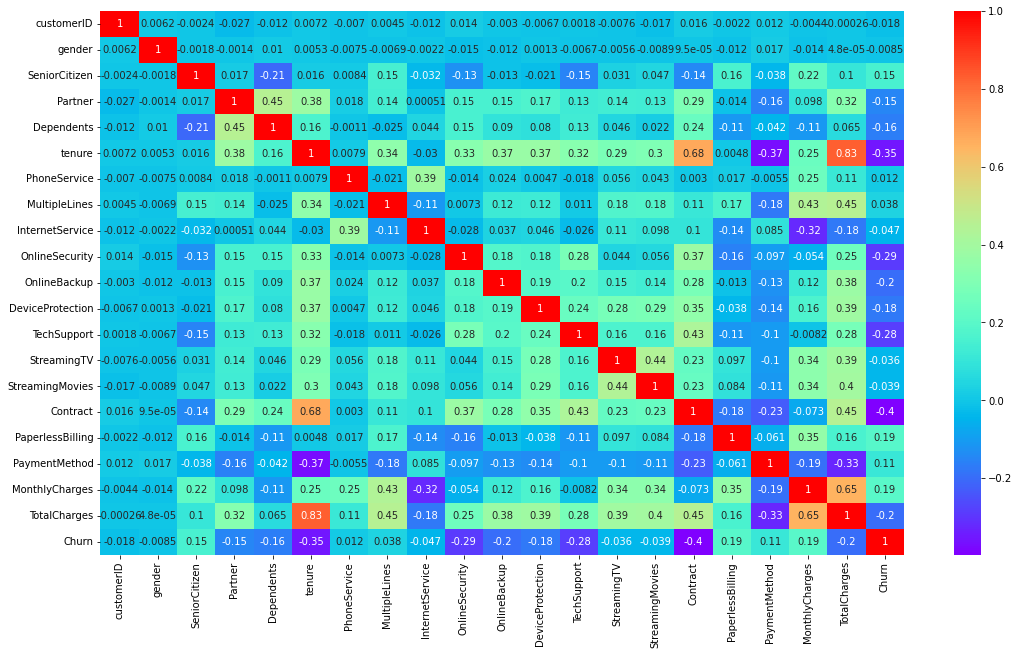

In [23]:
fig=plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap="rainbow",annot=True)

In [24]:
x = df.iloc[:,1:-1]

In [25]:
x.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [26]:
y = df['Churn']

In [27]:
y.head(1)

0    0
Name: Churn, dtype: int32

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=45)  

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model = RandomForestClassifier(n_estimators=50, random_state=45)

In [32]:
#training model
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=45)

In [33]:
# Prediction for test data
y_pred =model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [35]:
accuracy_score(y_test,y_pred)

0.7914691943127962

In [36]:
li=[10,20,35,45,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]

In [37]:
for i in li:
    mo = RandomForestClassifier(n_estimators=i,random_state=56)
    mo.fit(x_train,y_train)
    model_pred = mo.predict(x_test)
    acc = accuracy_score(y_test,model_pred)*100
    print("no. of trees -",i, ": Accuracy", acc)
#     print("Accuracy",acc)

no. of trees - 10 : Accuracy 78.38862559241706
no. of trees - 20 : Accuracy 79.5260663507109
no. of trees - 35 : Accuracy 79.14691943127961
no. of trees - 45 : Accuracy 78.86255924170617
no. of trees - 50 : Accuracy 79.14691943127961
no. of trees - 100 : Accuracy 79.62085308056872
no. of trees - 150 : Accuracy 79.62085308056872
no. of trees - 200 : Accuracy 79.62085308056872
no. of trees - 250 : Accuracy 79.28909952606635
no. of trees - 300 : Accuracy 79.19431279620854
no. of trees - 350 : Accuracy 79.14691943127961
no. of trees - 400 : Accuracy 79.33649289099526
no. of trees - 450 : Accuracy 79.38388625592417
no. of trees - 500 : Accuracy 79.43127962085308
no. of trees - 550 : Accuracy 79.28909952606635
no. of trees - 600 : Accuracy 79.33649289099526
no. of trees - 650 : Accuracy 79.0995260663507
no. of trees - 700 : Accuracy 79.19431279620854
no. of trees - 750 : Accuracy 79.24170616113744
no. of trees - 800 : Accuracy 79.28909952606635
no. of trees - 850 : Accuracy 79.19431279620854

In [38]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=56, criterion='entropy')
rf_model.fit(x_train, y_train)
rf_model_pred = rf_model.predict(x_test)
acc = accuracy_score(y_test, rf_model_pred)*100

In [39]:
acc

79.00473933649289